In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

In [25]:
# Load datasets
train_df = pd.read_csv('../data/train_df.csv')
test_df = pd.read_csv('../data/test_df.csv')

print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")
print(f"\nTrain columns: {train_df.columns.tolist()}")

Train set size: 2147
Test set size: 531

Train columns: ['prob_desc_time_limit', 'prob_desc_sample_outputs', 'src_uid', 'prob_desc_notes', 'prob_desc_description', 'prob_desc_output_spec', 'prob_desc_input_spec', 'prob_desc_output_to', 'prob_desc_input_from', 'lang', 'lang_cluster', 'difficulty', 'file_name', 'code_uid', 'prob_desc_memory_limit', 'prob_desc_sample_inputs', 'exec_outcome', 'source_code', 'prob_desc_created_at', 'tags', 'hidden_unit_tests', 'description_clean', 'code_clean', 'tags_list', 'tags_filtered']


In [9]:
# Display sample rows
train_df.head()

,prob_desc_time_limit,prob_desc_sample_outputs,src_uid,prob_desc_notes,prob_desc_description,prob_desc_output_spec,prob_desc_input_spec,prob_desc_output_to,prob_desc_input_from,lang,...,prob_desc_sample_inputs,exec_outcome,source_code,prob_desc_created_at,tags,hidden_unit_tests,description_clean,code_clean,tags_list,tags_filtered
0,2 seconds,"[""2\n2 4\n3 3\n3 1""]",591372383cf3624f69793c41370022de,NaN,"Numbers $$$1, 2, 3, \dots n$$$ (each integer f...","For each test case, in the first line, print t...",The first line contains one integer $$$t$$$ ($...,standard output,standard input,Python 3,...,"[""1\n4""]",PASSED,\ndef ii(): return int(input())\ndef mi(): ret...,1602407100,"['greedy', 'constructive algorithms', 'math', ...",NaN,"numbers 1, 2, 3, ... n each integer from 1 to ...","def ii return int input def mi return map int,...","['constructive algorithms', 'data structures',...",['math']
1,2 seconds,"[""5"", ""16"", ""18""]",e52ec2fa5bcf5d2027d57b0694b4e15a,NoteIn the first example it is possible to con...,You are given an undirected graph consisting o...,Print one integer — the minimum number of coin...,The first line contains two integers $$$n$$$ a...,standard output,standard input,Python 3,...,"[""3 2\n1 3 3\n2 3 5\n2 1 1"", ""4 0\n1 3 3 7"", ""...",PASSED,def read_nums():\n return [int(x) for x in ...,1545921300,"['dsu', 'greedy', 'graphs']",NaN,you are given an undirected graph consisting o...,def read nums return int x for x in input .spl...,"['dsu', 'graphs', 'greedy']",['graphs']
2,1 second,"[""2\n5000 9\n1\n7 \n4\n800 70 6 9000 \n1\n1000...",cd2519f4a7888b2c292f05c64a9db13a,NaN,A positive (strictly greater than zero) intege...,Print $$$t$$$ answers to the test cases. Each ...,The first line contains an integer $$$t$$$ ($$...,standard output,standard input,PyPy 3,...,"[""5\n5009\n7\n9876\n10000\n10""]",PASSED,t = int(input())\nfor i in range(t):\n canP...,1590154500,"['implementation', 'math']",NaN,a positive strictly greater than zero integer ...,t = int input for i in range t canprintlength ...,"['implementation', 'math']",['math']
3,1 second,"[""2 2 3"", ""1 2 3""]",c0abbbf1cf6c8ec11e942cdaaf01ad7c,NoteThe picture corresponds to the first examp...,"In Summer Informatics School, if a student doe...",For every student $$$a$$$ from $$$1$$$ to $$$n...,The first line of the input contains the only ...,standard output,standard input,Python 3,...,"[""3\n2 3 2"", ""3\n1 2 3""]",PASSED,"\n\ndef solve(arr, n):\n\n ans = """"\n fo...",1533994500,"['dfs and similar', 'brute force', 'graphs']",NaN,"in summer informatics school, if a student doe...","def solve arr, n ans = for i in range 1, n+1 h...","['brute force', 'dfs and similar', 'graphs']",['graphs']
4,1 second,"[""1\n2\n1 3"", ""0"", ""1\n4\n1 2 5 6""]",f78d04f699fc94103e5b08023949854d,"NoteIn the first sample, the string is '(()(('...","Now that Kuroni has reached 10 years old, he i...","In the first line, print an integer $$$k$$$ —...",The only line of input contains a string $$$s$...,standard output,standard input,Python 3,...,"[""(()(("", "")("", ""(()())""]",PASSED,s = input()\na = []\n\ni = 0\nj = len(s) - 1\n...,1583246100,"['constructive algorithms', 'two pointers', 'g...",NaN,"now that kuroni has reached 10 years old, he i...",s = input a = i = 0 j = len s - 1 while i < j ...,"['constructive algorithms', 'greedy', 'strings...",['strings']


In [10]:
# Check for missing values in focus columns
focus_cols = ['description_clean', 'code_clean', 'tags_filtered']

print("Missing values in train set:")
print(train_df[focus_cols].isnull().sum())
print("\nMissing values in test set:")
print(test_df[focus_cols].isnull().sum())

Missing values in train set:
description_clean    0
code_clean           0
tags_filtered        0
dtype: int64

Missing values in test set:
description_clean    0
code_clean           0
tags_filtered        0
dtype: int64


In [11]:
# Filter out rows with missing values
train_df = train_df[train_df['tags_filtered'].notna()].copy()
test_df = test_df[test_df['tags_filtered'].notna()].copy()

print(f"Train set after filtering: {len(train_df)}")
print(f"Test set after filtering: {len(test_df)}")

Train set after filtering: 2147
Test set after filtering: 531


## 3. Text analysis

In [26]:
# Calculate text lengths
train_df['description_length'] = train_df['description_clean'].astype(str).apply(len)
train_df['code_length'] = train_df['code_clean'].astype(str).apply(len)
train_df['description_word_count'] = train_df['description_clean'].astype(str).apply(lambda x: len(x.split()))
train_df['code_word_count'] = train_df['code_clean'].astype(str).apply(lambda x: len(x.split()))

# Statistics
print("Description Length Statistics (characters):")
print(train_df['description_length'].describe())
print("\nCode Length Statistics (characters):")
print(train_df['code_length'].describe())

Description Length Statistics (characters):
count    2147.000000
mean      858.157895
std       419.303517
min        77.000000
25%       559.000000
50%       791.000000
75%      1097.000000
max      3449.000000
Name: description_length, dtype: float64

Code Length Statistics (characters):
count     2147.000000
mean       910.251980
std       1554.586299
min         23.000000
25%        269.000000
50%        516.000000
75%        989.500000
max      34395.000000
Name: code_length, dtype: float64


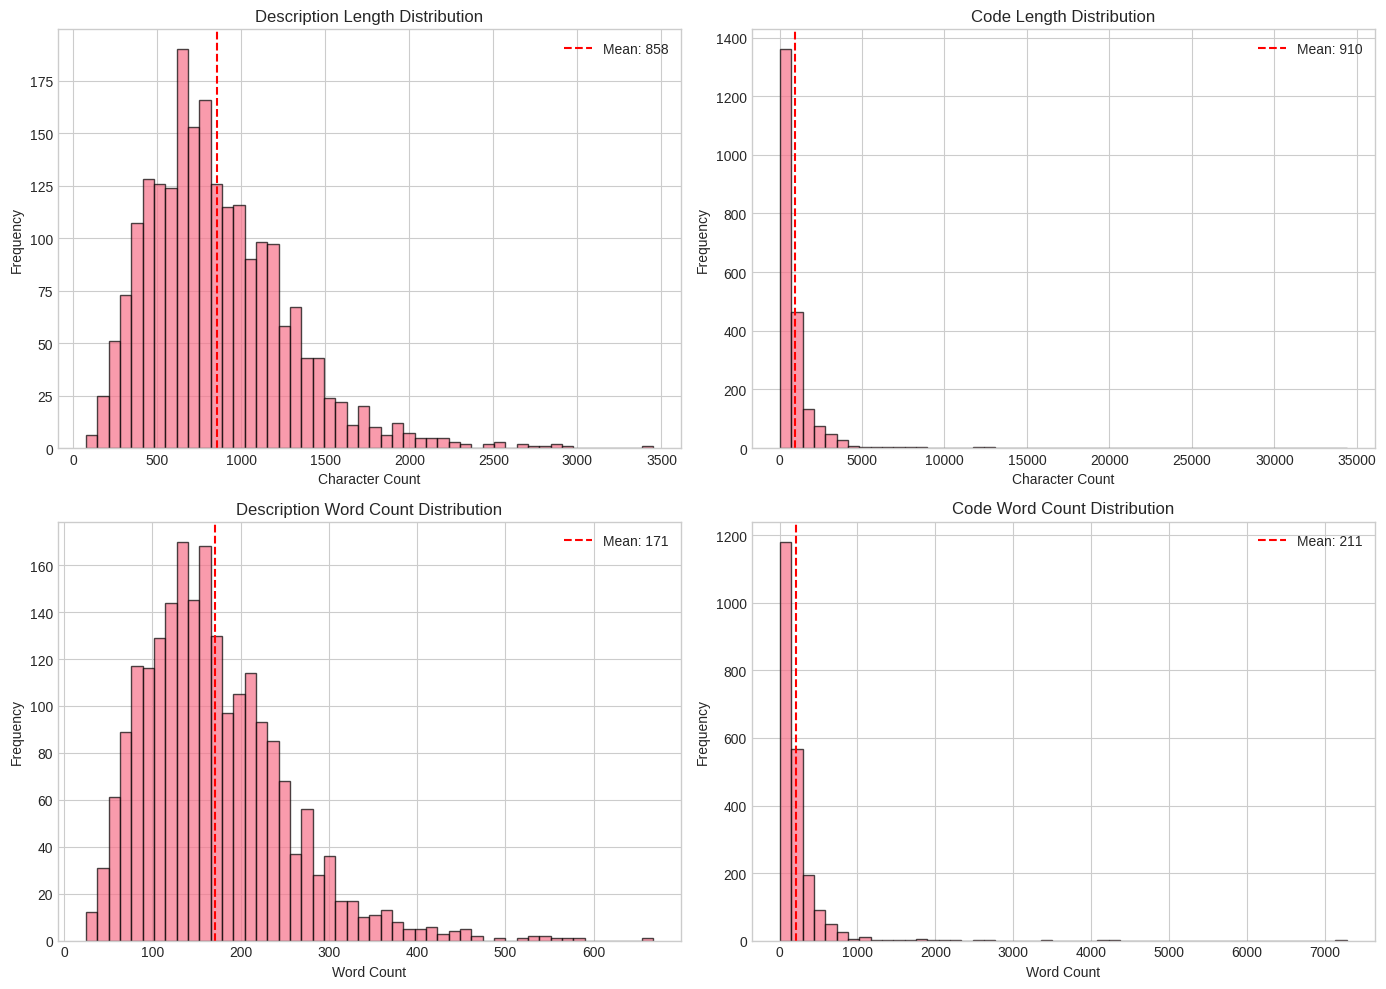

In [13]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Description length
axes[0, 0].hist(train_df['description_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Description Length Distribution')
axes[0, 0].axvline(train_df['description_length'].mean(), color='red', linestyle='--', label=f"Mean: {train_df['description_length'].mean():.0f}")
axes[0, 0].legend()

# Code length
axes[0, 1].hist(train_df['code_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Character Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Code Length Distribution')
axes[0, 1].axvline(train_df['code_length'].mean(), color='red', linestyle='--', label=f"Mean: {train_df['code_length'].mean():.0f}")
axes[0, 1].legend()

# Description word count
axes[1, 0].hist(train_df['description_word_count'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Word Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Description Word Count Distribution')
axes[1, 0].axvline(train_df['description_word_count'].mean(), color='red', linestyle='--', label=f"Mean: {train_df['description_word_count'].mean():.0f}")
axes[1, 0].legend()

# Code word count
axes[1, 1].hist(train_df['code_word_count'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Code Word Count Distribution')
axes[1, 1].axvline(train_df['code_word_count'].mean(), color='red', linestyle='--', label=f"Mean: {train_df['code_word_count'].mean():.0f}")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 4. Token Distribution Analysis

In [ ]:
# Import tiktoken for tokenization
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')
print(f"Tokenizer loaded: cl100k_base")
print(f"Example: 'Hello, world!' -> {len(tokenizer.encode('Hello, world!'))} tokens")

In [ ]:
# Calculate token counts
def count_tokens(text):
    """Count tokens in text using tiktoken."""
    if pd.isna(text):
        return 0
    return len(tokenizer.encode(str(text)))

print("Counting tokens for descriptions...")
train_df['description_tokens'] = train_df['description_clean'].apply(count_tokens)

print("Counting tokens for code...")
train_df['code_tokens'] = train_df['code_clean'].apply(count_tokens)

print("\nDone!")

In [ ]:
# Token statistics
print("Description Token Count Statistics:")
print(train_df['description_tokens'].describe())
print("\nCode Token Count Statistics:")
print(train_df['code_tokens'].describe())

# Combined statistics
train_df['total_tokens'] = train_df['description_tokens'] + train_df['code_tokens']
print("\nCombined (Description + Code) Token Count Statistics:")
print(train_df['total_tokens'].describe())

In [ ]:
# Visualize token distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Description tokens
axes[0, 0].hist(train_df['description_tokens'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Token Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Description Token Distribution')
axes[0, 0].axvline(train_df['description_tokens'].mean(), color='red', linestyle='--', 
                    label=f"Mean: {train_df['description_tokens'].mean():.0f}")
axes[0, 0].axvline(train_df['description_tokens'].median(), color='green', linestyle='--', 
                    label=f"Median: {train_df['description_tokens'].median():.0f}")
axes[0, 0].legend()

# Code tokens
axes[0, 1].hist(train_df['code_tokens'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Token Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Code Token Distribution')
axes[0, 1].axvline(train_df['code_tokens'].mean(), color='red', linestyle='--', 
                    label=f"Mean: {train_df['code_tokens'].mean():.0f}")
axes[0, 1].axvline(train_df['code_tokens'].median(), color='green', linestyle='--', 
                    label=f"Median: {train_df['code_tokens'].median():.0f}")
axes[0, 1].legend()

# Combined tokens
axes[1, 0].hist(train_df['total_tokens'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_xlabel('Token Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Combined (Description + Code) Token Distribution')
axes[1, 0].axvline(train_df['total_tokens'].mean(), color='red', linestyle='--', 
                    label=f"Mean: {train_df['total_tokens'].mean():.0f}")
axes[1, 0].axvline(train_df['total_tokens'].median(), color='green', linestyle='--', 
                    label=f"Median: {train_df['total_tokens'].median():.0f}")
axes[1, 0].legend()

# Box plot comparison
token_data = [train_df['description_tokens'], train_df['code_tokens']]
axes[1, 1].boxplot(token_data, labels=['Description', 'Code'], patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_ylabel('Token Count')
axes[1, 1].set_title('Token Count Comparison (Box Plot)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Analyze token count percentiles
percentiles = [50, 75, 90, 95, 99]

print("Token Count Percentiles:")
print("\nDescription Tokens:")
for p in percentiles:
    val = np.percentile(train_df['description_tokens'], p)
    print(f"  {p}th percentile: {val:.0f} tokens")

print("\nCode Tokens:")
for p in percentiles:
    val = np.percentile(train_df['code_tokens'], p)
    print(f"  {p}th percentile: {val:.0f} tokens")

print("\nCombined (Description + Code) Tokens:")
for p in percentiles:
    val = np.percentile(train_df['total_tokens'], p)
    print(f"  {p}th percentile: {val:.0f} tokens")

# Check how many samples exceed common context lengths
context_limits = [512, 1024, 2048]
print("\n" + "="*50)
print("Samples exceeding common context lengths:")
for limit in context_limits:
    desc_count = (train_df['description_tokens'] > limit).sum()
    desc_pct = desc_count / len(train_df) * 100
    code_count = (train_df['code_tokens'] > limit).sum()
    code_pct = code_count / len(train_df) * 100
    total_count = (train_df['total_tokens'] > limit).sum()
    total_pct = total_count / len(train_df) * 100
    
    print(f"\n{limit} tokens:")
    print(f"  Description: {desc_count} samples ({desc_pct:.1f}%)")
    print(f"  Code:        {code_count} samples ({code_pct:.1f}%)")
    print(f"  Combined:    {total_count} samples ({total_pct:.1f}%)")

In [ ]:
# Token distribution by tag
print("Average token counts by tag:")
print("\n" + "="*70)
print(f"{'Tag':<15} {'Desc Tokens':>12} {'Code Tokens':>12} {'Total Tokens':>13}")
print("="*70)

for tag in FOCUS_TAGS:
    mask = train_df['tags_list'].apply(lambda x: tag in x)
    if mask.sum() > 0:
        desc_mean = train_df[mask]['description_tokens'].mean()
        code_mean = train_df[mask]['code_tokens'].mean()
        total_mean = train_df[mask]['total_tokens'].mean()
        print(f"{tag:<15} {desc_mean:>12.0f} {code_mean:>12.0f} {total_mean:>13.0f}")

print("="*70)
print(f"{'Overall':<15} {train_df['description_tokens'].mean():>12.0f} "
      f"{train_df['code_tokens'].mean():>12.0f} {train_df['total_tokens'].mean():>13.0f}")

## 5.. Tags Distribution

In [14]:
# Parse tags
def parse_tags(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return x if isinstance(x, list) else []

train_df['tags_list'] = train_df['tags_filtered'].apply(parse_tags)
test_df['tags_list'] = test_df['tags_filtered'].apply(parse_tags)

# Focus tags
FOCUS_TAGS = ['math', 'graphs', 'strings', 'number theory', 'trees', 'geometry', 'games', 'probabilities']

print(f"Focus tags: {FOCUS_TAGS}")

Focus tags: ['math', 'graphs', 'strings', 'number theory', 'trees', 'geometry', 'games', 'probabilities']


In [15]:
# Count tag occurrences
tag_counts_train = Counter()
for tags in train_df['tags_list']:
    for tag in tags:
        if tag in FOCUS_TAGS:
            tag_counts_train[tag] += 1

tag_counts_test = Counter()
for tags in test_df['tags_list']:
    for tag in tags:
        if tag in FOCUS_TAGS:
            tag_counts_test[tag] += 1

print("Tag distribution in TRAIN set:")
for tag in FOCUS_TAGS:
    count = tag_counts_train.get(tag, 0)
    pct = count / len(train_df) * 100
    print(f"  {tag:15} : {count:5} ({pct:.1f}%)")

print("\nTag distribution in TEST set:")
for tag in FOCUS_TAGS:
    count = tag_counts_test.get(tag, 0)
    pct = count / len(test_df) * 100
    print(f"  {tag:15} : {count:5} ({pct:.1f}%)")

Tag distribution in TRAIN set:
  math            :  1126 (52.4%)
  graphs          :   434 (20.2%)
  strings         :   338 (15.7%)
  number theory   :   280 (13.0%)
  trees           :   259 (12.1%)
  geometry        :   133 (6.2%)
  games           :    84 (3.9%)
  probabilities   :    74 (3.4%)

Tag distribution in TEST set:
  math            :   283 (53.3%)
  graphs          :   108 (20.3%)
  strings         :    84 (15.8%)
  number theory   :    70 (13.2%)
  trees           :    65 (12.2%)
  geometry        :    33 (6.2%)
  games           :    21 (4.0%)
  probabilities   :    18 (3.4%)


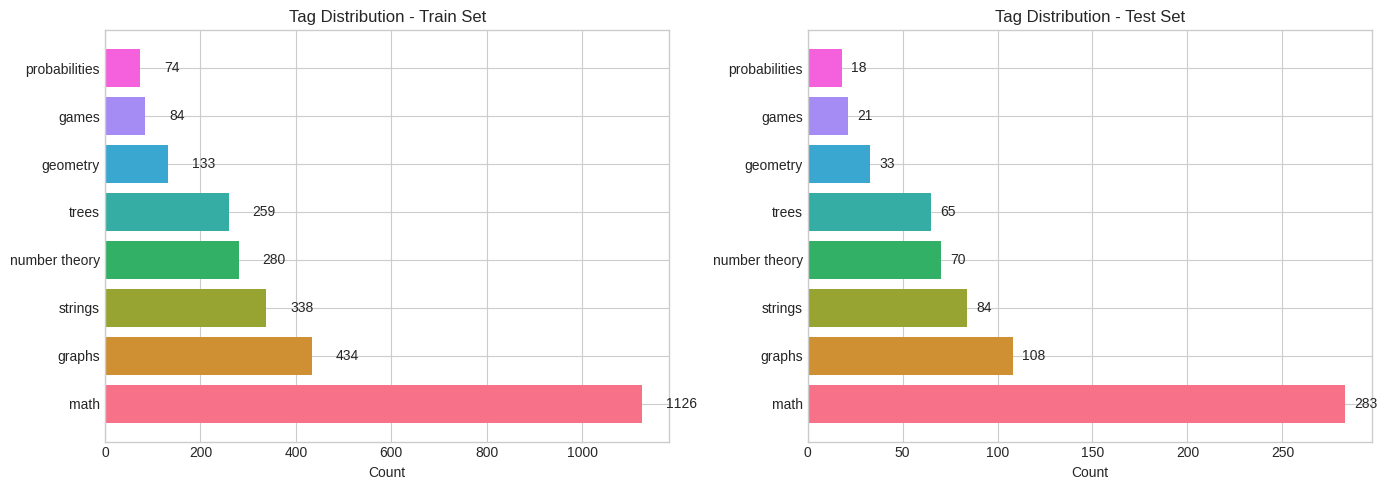

In [16]:
# Visualize tag distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train set
tags = FOCUS_TAGS
train_counts = [tag_counts_train.get(tag, 0) for tag in tags]
test_counts = [tag_counts_test.get(tag, 0) for tag in tags]

colors = sns.color_palette('husl', len(tags))

axes[0].barh(tags, train_counts, color=colors)
axes[0].set_xlabel('Count')
axes[0].set_title('Tag Distribution - Train Set')
for i, v in enumerate(train_counts):
    axes[0].text(v + 50, i, str(v), va='center')

axes[1].barh(tags, test_counts, color=colors)
axes[1].set_xlabel('Count')
axes[1].set_title('Tag Distribution - Test Set')
for i, v in enumerate(test_counts):
    axes[1].text(v + 5, i, str(v), va='center')

plt.tight_layout()
plt.show()

## 6.. Class Imbalance Analysis

In [17]:
# Calculate imbalance ratio
max_count = max(tag_counts_train.values())
min_count = min(tag_counts_train.values())

print(f"Most common tag: {max(tag_counts_train, key=tag_counts_train.get)} ({max_count})")
print(f"Least common tag: {min(tag_counts_train, key=tag_counts_train.get)} ({min_count})")
print(f"\nImbalance ratio (max/min): {max_count/min_count:.2f}x")

# Calculate percentage of samples with each tag
print("\n--- Class Imbalance Summary ---")
print(f"{'Tag':<15} {'Count':>7} {'% of Dataset':>12} {'Imbalance':>10}")
print("-" * 50)
for tag in sorted(FOCUS_TAGS, key=lambda x: tag_counts_train.get(x, 0), reverse=True):
    count = tag_counts_train.get(tag, 0)
    pct = count / len(train_df) * 100
    imbalance = max_count / count if count > 0 else float('inf')
    print(f"{tag:<15} {count:>7} {pct:>11.1f}% {imbalance:>9.1f}x")

Most common tag: math (1126)
Least common tag: probabilities (74)

Imbalance ratio (max/min): 15.22x

--- Class Imbalance Summary ---
Tag               Count % of Dataset  Imbalance
--------------------------------------------------
math               1126        52.4%       1.0x
graphs              434        20.2%       2.6x
strings             338        15.7%       3.3x
number theory       280        13.0%       4.0x
trees               259        12.1%       4.3x
geometry            133         6.2%       8.5x
games                84         3.9%      13.4x
probabilities        74         3.4%      15.2x


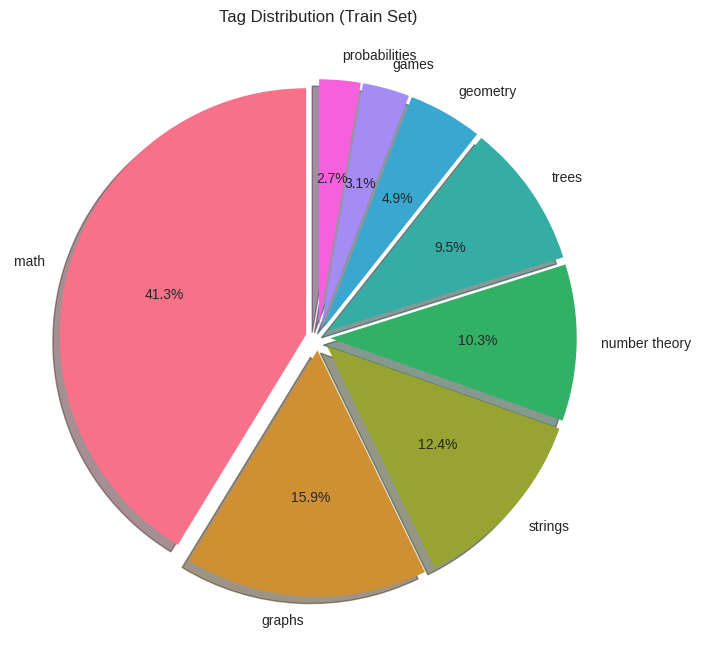

In [18]:
# Pie chart for class distribution
fig, ax = plt.subplots(figsize=(10, 8))

sizes = [tag_counts_train.get(tag, 0) for tag in FOCUS_TAGS]
explode = [0.05] * len(FOCUS_TAGS)

ax.pie(sizes, explode=explode, labels=FOCUS_TAGS, autopct='%1.1f%%',
       shadow=True, startangle=90, colors=colors)
ax.set_title('Tag Distribution (Train Set)')
plt.show()

## 7.. Tags per sample

In [19]:
# Number of tags per sample
train_df['num_tags'] = train_df['tags_list'].apply(lambda x: len([t for t in x if t in FOCUS_TAGS]))
test_df['num_tags'] = test_df['tags_list'].apply(lambda x: len([t for t in x if t in FOCUS_TAGS]))

print("Number of tags per sample (Train):")
print(train_df['num_tags'].value_counts().sort_index())

print("\nNumber of tags per sample (Test):")
print(test_df['num_tags'].value_counts().sort_index())

Number of tags per sample (Train):
num_tags
1    1626
2     468
3      47
4       5
5       1
Name: count, dtype: int64

Number of tags per sample (Test):
num_tags
1    392
2    129
3      8
4      2
Name: count, dtype: int64


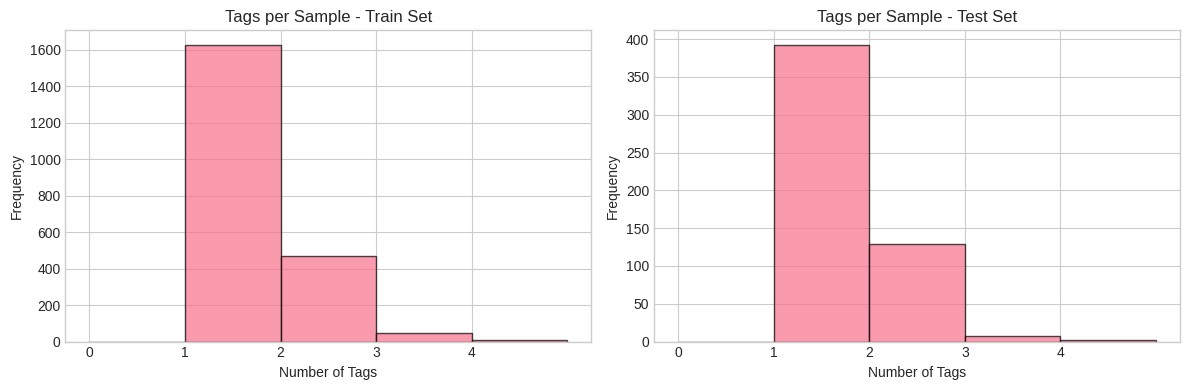


Average tags per sample (Train): 1.27
Average tags per sample (Test): 1.28


In [20]:
# Visualize number of tags distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

train_df['num_tags'].hist(ax=axes[0], bins=range(0, 6), edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Tags')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Tags per Sample - Train Set')
axes[0].set_xticks(range(0, 5))

test_df['num_tags'].hist(ax=axes[1], bins=range(0, 6), edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Number of Tags')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Tags per Sample - Test Set')
axes[1].set_xticks(range(0, 5))

plt.tight_layout()
plt.show()

print(f"\nAverage tags per sample (Train): {train_df['num_tags'].mean():.2f}")
print(f"Average tags per sample (Test): {test_df['num_tags'].mean():.2f}")

## 8.. Tag Co-occurrence Analysis

In [21]:
# Create co-occurrence matrix
from sklearn.preprocessing import MultiLabelBinarizer

# Filter to focus tags only
train_df['focus_tags'] = train_df['tags_list'].apply(lambda x: [t for t in x if t in FOCUS_TAGS])

mlb = MultiLabelBinarizer(classes=FOCUS_TAGS)
tag_matrix = mlb.fit_transform(train_df['focus_tags'])

# Co-occurrence matrix
cooccurrence = np.dot(tag_matrix.T, tag_matrix)
cooccurrence_df = pd.DataFrame(cooccurrence, index=FOCUS_TAGS, columns=FOCUS_TAGS)

print("Tag Co-occurrence Matrix:")
cooccurrence_df

Tag Co-occurrence Matrix:


,math,graphs,strings,number theory,trees,geometry,games,probabilities
math,1126,62,29,209,30,50,22,37
graphs,62,434,11,17,95,4,5,6
strings,29,11,338,5,12,1,5,0
number theory,209,17,5,280,9,3,7,7
trees,30,95,12,9,259,4,7,9
geometry,50,4,1,3,4,133,2,0
games,22,5,5,7,7,2,84,1
probabilities,37,6,0,7,9,0,1,74


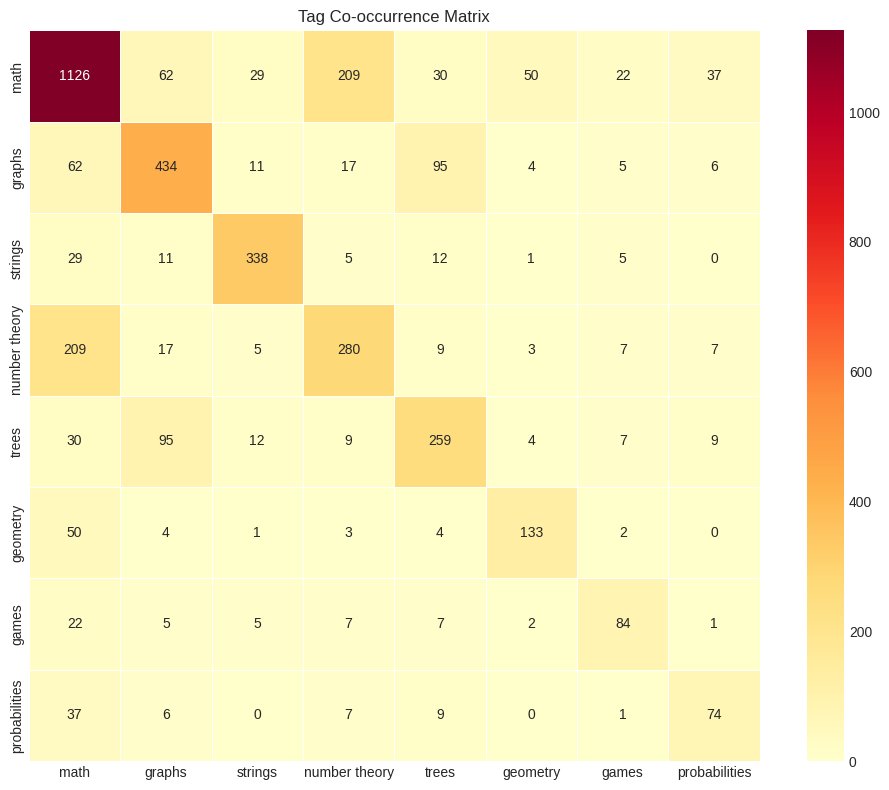

In [22]:
# Visualize co-occurrence matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cooccurrence_df, annot=True, fmt='d', cmap='YlOrRd', 
            linewidths=0.5, square=True)
plt.title('Tag Co-occurrence Matrix')
plt.tight_layout()
plt.show()